In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# images_folder = '/content/drive/MyDrive/CV/IDD20K_II/image_archive'
# masks_folder = '/content/drive/MyDrive/CV/IDD20K_II/mask_archive'
data = '/content/drive/MyDrive/CV /Cropped_final'

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, dataset_path, classes, transform=None):
        self.dataset_path = dataset_path
        self.classes = classes
        self.data = self.load_data()
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label

    def load_data(self):
        data = []
        for folder, label in self.classes.items():
            folder_path = os.path.join(self.dataset_path, folder)
            for file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, file)
                data.append((img_path, label))
        return data

# Define the paths and classes
dataset_path = '/content/drive/MyDrive/CV /Cropped_final'
classes = {
    'amur_leopard': 0,
    'amur_tiger': 1,
    'birds': 2,
    'black_bear': 3,
    'brown_bear': 4,
    'dog': 5,
    'roe_deer': 6,
    'sika_deer': 7,
    'wild_boar': 8,
    'people': 9
}

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Removed antialiasing
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset and dataloaders
custom_dataset = CustomDataset(dataset_path, classes, transform)

train_size = int(0.7 * len(custom_dataset))
val_size = int(0.1 * len(custom_dataset))
test_size = len(custom_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(custom_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=32)  # Adjust num_workers as needed
val_loader = DataLoader(val_dataset, batch_size=64, num_workers=32)
test_loader = DataLoader(test_dataset, batch_size=64, num_workers=32)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

8977 1282 2566


In [ ]:
names = {
    0: 'amur_leopard',
    1: 'amur_tiger',
    2: 'birds',
    3: 'black_bear',
    4: 'brown_bear',
    5: 'dog',
    6: 'roe_deer',
    7: 'sika_deer',
    8: 'wild_boar',
    9: 'people'
}

In [ ]:
val_dist = {}
for i in range(len(val_dataset)):
  label = val_dataset[i][1]
  val_dist[names[label]] = val_dist.get(names[label], 0) + 1

test_dist = {}
for i in range(len(test_dataset)):
  label = test_dataset[i][1]
  test_dist[names[label]] = test_dist.get(names[label], 0) + 1

KeyboardInterrupt: 

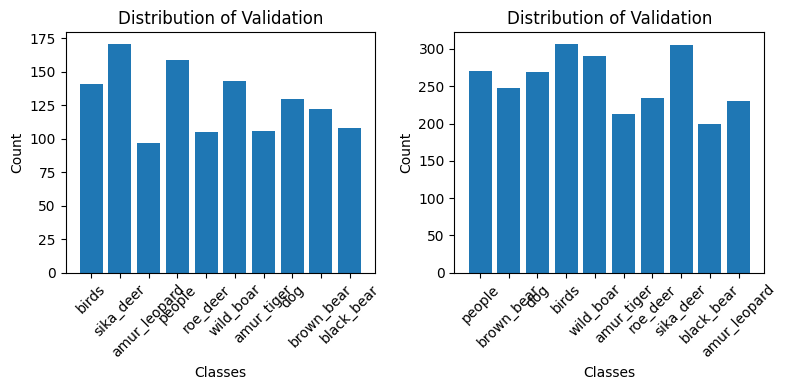

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

keys_val = list(val_dist.keys())
values_val = list(val_dist.values())

keys_test = list(test_dist.keys())
values_test = list(test_dist.values())

axs[0].bar(keys_val, values_val)
axs[0].set_title('Distribution of Validation')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(keys_test, values_test)
axs[1].set_title('Distribution of Validation')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
!pip install wandb
import wandb


wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
params = dict(
    epochs = 10,
    classes = 10,
    kernels = [3, 3, 3, 3, 3],
    batch_size = 32,
    learning_rate = 0.001,
    dataset = "Russian Wildlife Dataset",
    architecture = "CNN"
)

In [ ]:
import torch

class ConvNet(torch.nn.Module):
    def __init__(self, classes):
        super(ConvNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=4, stride=4)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = torch.nn.Linear(128*4*4, classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        # print(out.shape)
        out = out.reshape(out.shape[0], -1)
        out = self.fc1(out)
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
wandb.init(project="pytorch-demo", config=params)

wandb: Currently logged in as: abhay_c (abhayc). Use `wandb login --relogin` to force relogin


In [ ]:
# access all HPs through wandb.config, so logging matches execution!
config = wandb.config
model = ConvNet(config.classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)
wandb.watch(model, criterion, log="all", log_freq=10)

total_batches = len(train_loader) * config.epochs
example_ct = 0  # number of examples seen
batch_ct = 0
for epoch in range(config.epochs):
    print("Epoch:", epoch)
    correct, total = 0, 0
    for _, (images, labels) in enumerate(train_loader):

        images, labels = images.to(device), labels.to(device)

        # Forward pass ➡
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass ⬅
        optimizer.zero_grad()
        loss.backward()

        # Step with optimizer
        optimizer.step()

        example_ct +=  len(images)
        batch_ct += 1

        wandb.log({"Training loss": loss})
        print("Training loss : ", loss, "till ", batch_ct)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        wandb.log({"Training Accuracy": correct / total})


    model.eval()
    # Run the model on some test examples
    with torch.no_grad():
        correct, total = 0, 0
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"Accuracy of the model on the {total} " +
              f"validation images: {correct / total:%}")

        wandb.log({"validation_accuracy": correct / total})

batch loss,▂█▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▂▁▁▂▁▁▁
epoch,▁▁▁▁▁████
loss,▇█▅▅▄▆▃▁▁
test_accuracy,▁
batch loss,2.09495
epoch,1
loss,1.26186
test_accuracy,0.43375


Epoch: 0
Training loss :  tensor(2.3038, device='cuda:0', grad_fn=<NllLossBackward0>) till  1
Training loss :  tensor(2.6274, device='cuda:0', grad_fn=<NllLossBackward0>) till  2
Training loss :  tensor(2.2165, device='cuda:0', grad_fn=<NllLossBackward0>) till  3
Training loss :  tensor(2.2582, device='cuda:0', grad_fn=<NllLossBackward0>) till  4
Training loss :  tensor(2.2895, device='cuda:0', grad_fn=<NllLossBackward0>) till  5
Training loss :  tensor(2.2108, device='cuda:0', grad_fn=<NllLossBackward0>) till  6
Training loss :  tensor(2.1831, device='cuda:0', grad_fn=<NllLossBackward0>) till  7
Training loss :  tensor(2.2247, device='cuda:0', grad_fn=<NllLossBackward0>) till  8
Training loss :  tensor(2.1990, device='cuda:0', grad_fn=<NllLossBackward0>) till  9
Training loss :  tensor(2.1860, device='cuda:0', grad_fn=<NllLossBackward0>) till  10
Training loss :  tensor(2.1662, device='cuda:0', grad_fn=<NllLossBackward0>) till  11
Training loss :  tensor(2.1021, device='cuda:0', grad_

In [ ]:
import torch
torch.save(model.state_dict(), '/content/drive/MyDrive/CV /Models/CNN_Forest.pth')

# Save model weights as a wandb artifact
artifact = wandb.Artifact("model_weights", type="model")
artifact.add_file('/content/drive/MyDrive/CV /Models/CNN_Forest.pth')
wandb.log_artifact(artifact)

## Look at the training and validation loss plots and comment whether the model is overfitting or not.

We obtained a train accuracy of 79 while a val accuracy of 66, the gap is present however not extremely significant, thus we see some level of overfitting however not to an extent where it's rendering the model un usable

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model = ConvNet(10)
model.load_state_dict(torch.load('/content/drive/MyDrive/CV /Models/CNN_Forest.pth', map_location=torch.device('cpu')))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set model to evaluation mode
model.eval()

# Lists to store predicted and true labels
all_predicted = []
all_labels = []

# Disable gradients for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy and F1-score
accuracy = accuracy_score(all_labels, all_predicted)
f1 = f1_score(all_labels, all_predicted, average='weighted')

# Print accuracy and F1-score
print(f"Accuracy of the model on the test set: {accuracy:.2f}")
print(f"F1-score of the model on the test set: {f1:.2f}")

Accuracy of the model on the test set: 0.79
F1-score of the model on the test set: 0.79


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)
# Log accuracy, F1-score, and confusion matrix to wandb
wandb.log({"Test Accuracy": accuracy, "Test F1-score": f1})
wandb.log({"Confusion Matrix": wandb.plot.confusion_matrix(probs=None,
                                                            y_true=np.array(all_labels),
                                                            preds=np.array(all_predicted),
                                                            class_names=list(range(10)))})

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


True Label: amur_leopard


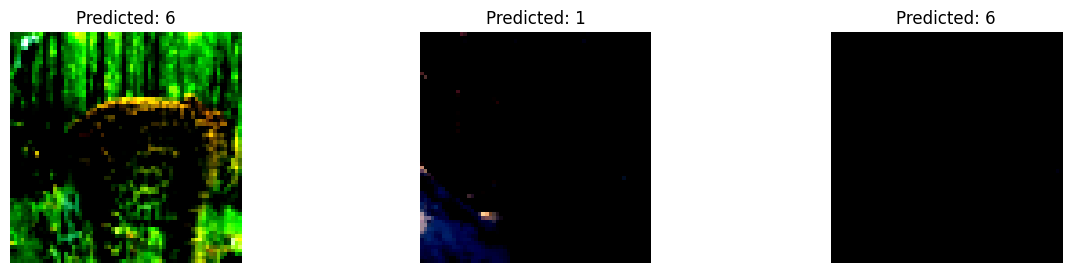

True Label: amur_tiger


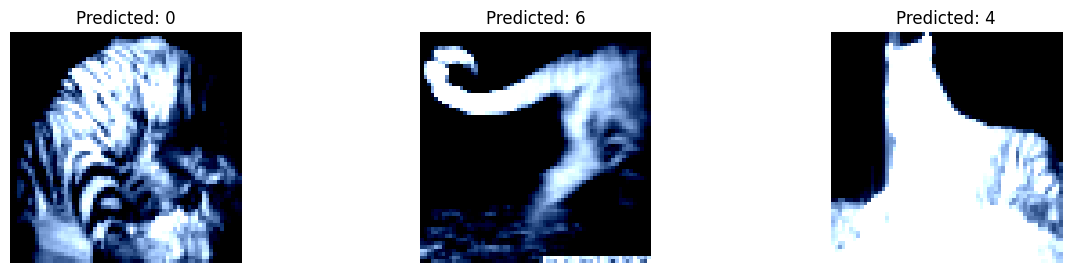

True Label: birds


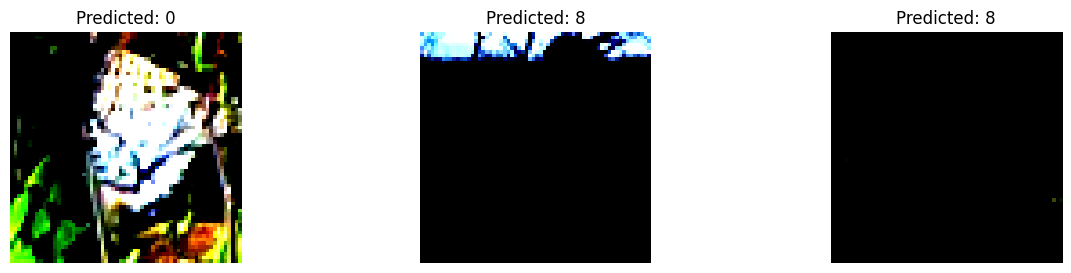

True Label: black_bear


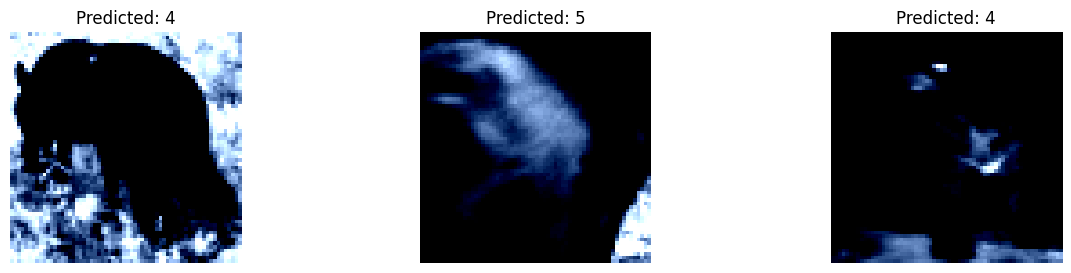

True Label: brown_bear


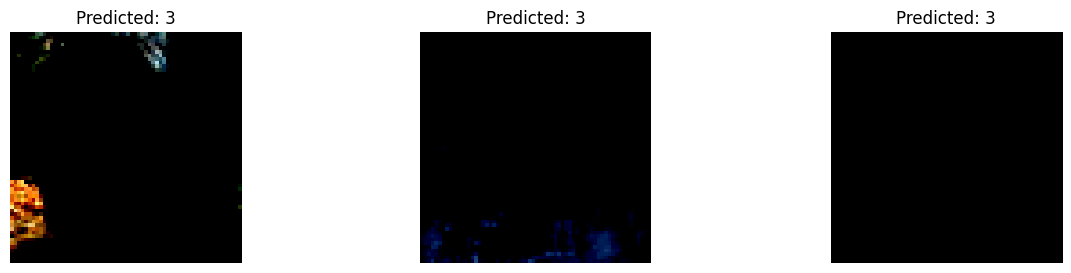

True Label: dog


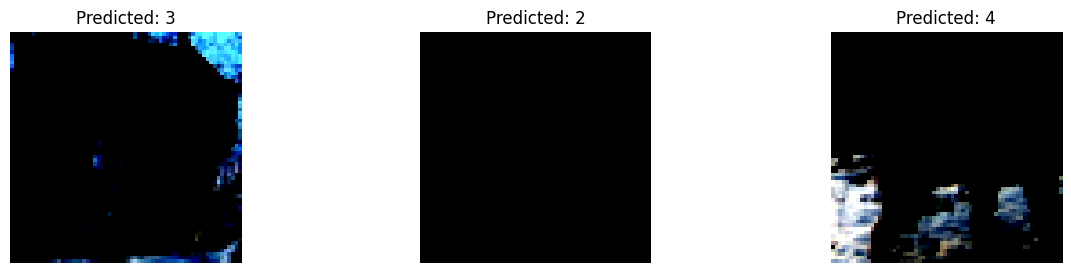

True Label: roe_deer


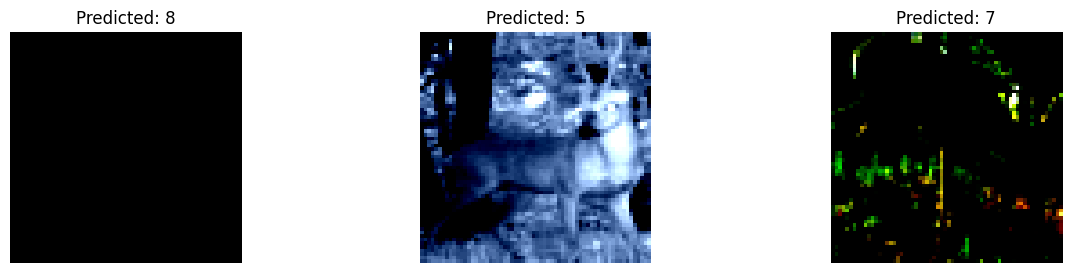

True Label: sika_deer


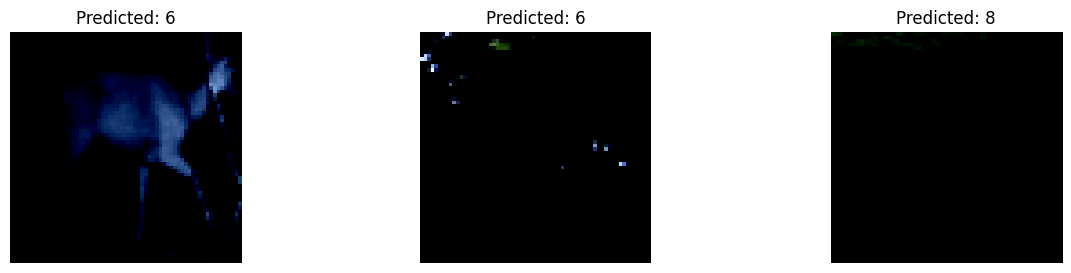

True Label: wild_boar


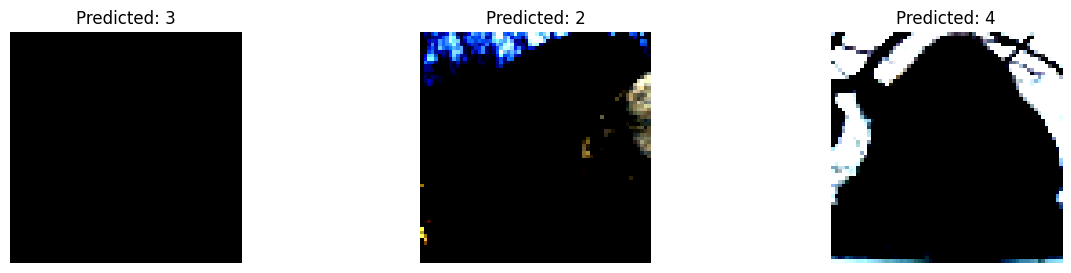

True Label: people


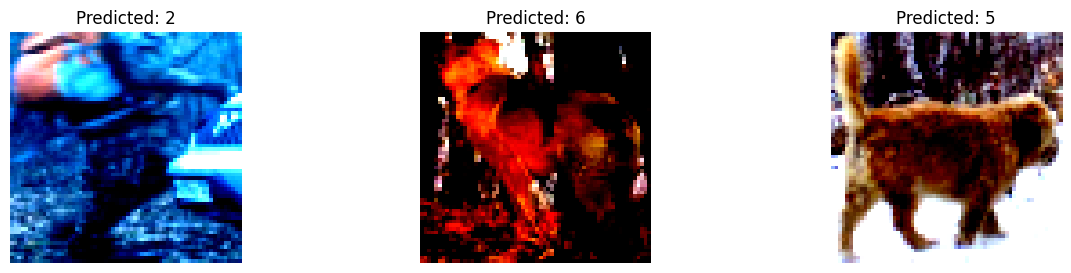

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set model to evaluation mode
model.eval()

# Dictionary to store misclassified images grouped by true labels
misclassified_by_class = {i: [] for i in range(10)}  # Assuming num_classes is defined

# Disable gradients for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        incorrect_idx = (predicted != labels).nonzero().squeeze()
        incorrect_images = images[incorrect_idx].cpu().numpy()
        incorrect_labels = labels[incorrect_idx].cpu().numpy()
        predicted_labels = predicted[incorrect_idx].cpu().numpy()
        for i in range(len(incorrect_idx)):
            true_label = incorrect_labels[i]
            if len(misclassified_by_class[true_label]) < 3:  # Limit to 3 misclassified images per true class
                misclassified_by_class[true_label].append((incorrect_images[i], predicted_labels[i]))

# Visualize misclassified images grouped by true class
for true_label, misclassified_list in misclassified_by_class.items():
    if misclassified_list:
        print(f"True Label: {names[true_label]}")
        fig, axes = plt.subplots(1, len(misclassified_list), figsize=(15, 3))
        for i, (image, predicted_label) in enumerate(misclassified_list):
            axes[i].imshow(np.transpose(image, (1, 2, 0)))  # Transpose the image axes
            axes[i].set_title(f"Predicted: {predicted_label}")
            axes[i].axis('off')
        plt.show()


There are primarily two types of images which are failing, one are the ones in which the colors are not clear, and would be hard to identify even for a human, and second are the ones which due to lack of lighting primarily are indistinguishable from other classes.

To solve this problem, data augmentation is the first possible solution that one can try to increase generalizability. As an example even though a leopard is not identifieable, however due to the presence of the orage and black spots we can say its a leopard, and such generalizaiblity can be introduced due we introduced transformations such as gaussian blurs, rotations and changes in lighting

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

res_model = resnet18(pretrained= True)
res_model.to(device)
print(res_model.parameters().__next__().device)
print(next(res_model.parameters()).is_cuda)

cpu


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.2MB/s]


cpu
False


In [ ]:
import time
from torchvision.models import resnet18, ResNet18_Weights

wandb.init(project="pytorch-demo", config=params)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

res_model = resnet18(pretrained= True)
in_frs = res_model.fc.in_features
res_model.fc = nn.Linear(in_features = in_frs, out_features = 10)
res_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(res_model.parameters(), lr=0.0001)

wandb.watch(res_model, criterion, log="all", log_freq=10)

total_batches = len(train_loader) * 10
example_ct = 0  # number of examples seen
batch_ct = 0
for epoch in range(10):
    print("Epoch:", epoch)
    correct, total = 0, 0
    # for _, (images, labels) in enumerate(train_loader):

    start = time.time()
    for _, (images, labels) in enumerate(train_loader):
        end = time.time()
        print("Time taken to load images =", end-start)
        start_model = time.time()

        images, labels = images.to(device), labels.to(device)

        # Forward pass ➡
        # print(res_model.parameters().__next__().device)
        # print("Image tensor is on device:", images.device)
        outputs = res_model(images)
        loss = criterion(outputs, labels)

        # Backward pass ⬅
        optimizer.zero_grad()
        loss.backward()

        # Step with optimizer
        optimizer.step()

        example_ct +=  len(images)
        batch_ct += 1

        wandb.log({"Training loss": loss})
        print("Training loss : ", loss, "till ", batch_ct)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        wandb.log({"Training Accuracy": correct / total})

        end_model = time.time()
        print("Time taken to run one batch is :", end_model-start_model)

        start = time.time()


    res_model.eval()
    # Run the model on some test examples
    with torch.no_grad():
        correct, total = 0, 0
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = res_model(images)
            val_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"Accuracy of the res_model on the {total} " +
              f"validation images: {correct / total:%}")

        wandb.log({"Validation loss": val_loss})
        wandb.log({"validation_accuracy": correct / total})

cpu


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


Epoch: 0


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Time taken to load images = 69.73256468772888
Training loss :  tensor(2.6590, grad_fn=<NllLossBackward0>) till  1
Time taken to run one batch is : 7.973876237869263
Time taken to load images = 5.460654020309448
Training loss :  tensor(2.5778, grad_fn=<NllLossBackward0>) till  2
Time taken to run one batch is : 5.054236650466919
Time taken to load images = 0.0002455711364746094
Training loss :  tensor(2.4354, grad_fn=<NllLossBackward0>) till  3
Time taken to run one batch is : 7.830899000167847
Time taken to load images = 0.01426386833190918
Training loss :  tensor(2.2558, grad_fn=<NllLossBackward0>) till  4
Time taken to run one batch is : 4.053728818893433
Time taken to load images = 0.000263214111328125
Training loss :  tensor(2.3159, grad_fn=<NllLossBackward0>) till  5
Time taken to run one batch is : 4.317643165588379
Time taken to load images = 0.0004382133483886719
Training loss :  tensor(2.3166, grad_fn=<NllLossBackward0>) till  6
Time taken to run one batch is : 4.3474624156951

In [ ]:
torch.save(res_model.state_dict(), '/content/drive/MyDrive/CV /Models/FinetuningResnet_Forest.pth')
artifact = wandb.Artifact("FinetuningResnet_Forest", type="model")
artifact.add_file('/content/drive/MyDrive/CV /Models/FinetuningResnet_Forest.pth')
wandb.log_artifact(artifact)

<Artifact FinetuningResnet_Forest>

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from torchvision.models import resnet18

model = resnet18(pretrained= True)
in_frs = model.fc.in_features
model.fc = nn.Linear(in_features = in_frs, out_features = 10)

model.load_state_dict(torch.load('/content/drive/MyDrive/CV /Models/FinetuningResnet_Forest.pth', map_location=torch.device('cpu')))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Set model to evaluation mode
model.eval()

# Lists to store predicted and true labels
all_predicted = []
all_labels = []

# Disable gradients for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy and F1-score
accuracy = accuracy_score(all_labels, all_predicted)
f1 = f1_score(all_labels, all_predicted, average='weighted')

# Print accuracy and F1-score
print(f"Accuracy of the model on the test set: {accuracy:.2f}")
print(f"F1-score of the model on the test set: {f1:.2f}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 54.3MB/s]


Accuracy of the model on the test set: 0.95
F1-score of the model on the test set: 0.95


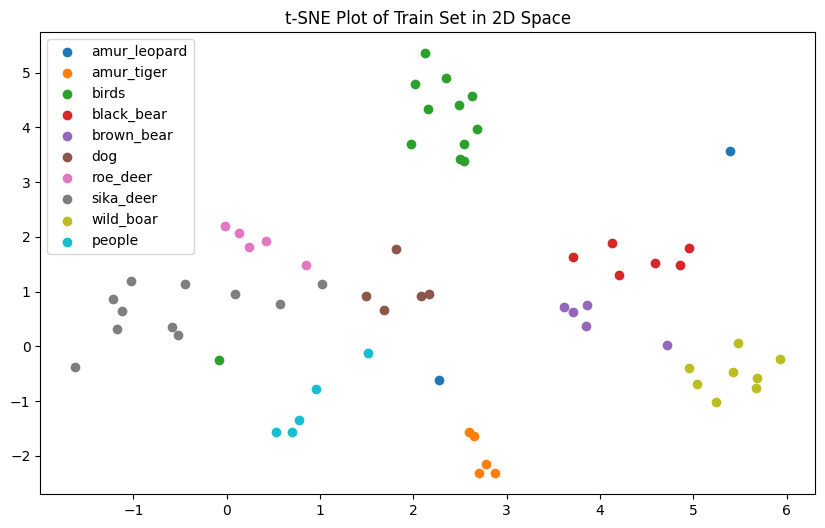

In [ ]:
# Function to extract features using the ResNet-18 backbone for a subset of data
from sklearn.manifold import TSNE

def extract_subset_features(loader, model, num_samples=20):
    model.eval()
    feature_list = []
    labels_list = []
    samples = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            features = model(images)
            feature_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())
            samples += len(labels)
            if samples >= num_samples:
                break
    features = np.concatenate(feature_list)
    labels = np.concatenate(labels_list)
    return features, labels

# Extract features from a subset of train and validation sets (20 samples each)
num_samples = 20
train_features, train_labels = extract_subset_features(train_loader, model, num_samples)
val_features, val_labels = extract_subset_features(val_loader, model, num_samples)

# Perform t-SNE on train and validation features
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
train_tsne = tsne.fit_transform(train_features)
val_tsne = tsne.fit_transform(val_features)

# Plot t-SNE of train set in 2D space
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    plt.scatter(train_tsne[train_labels == i, 0], train_tsne[train_labels == i, 1], label=list(classes.keys())[i])
plt.title('t-SNE Plot of Train Set in 2D Space')
plt.legend()

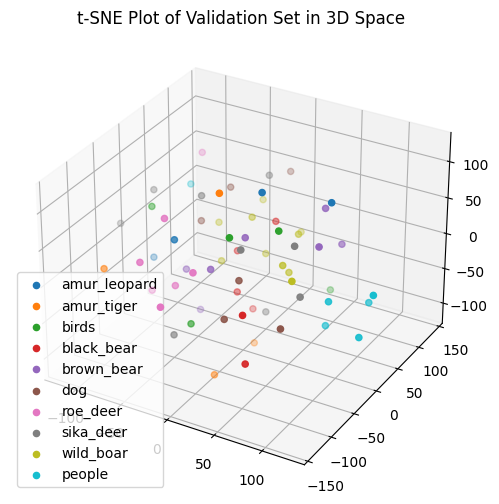

In [ ]:
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
val_tsne_3d = tsne_3d.fit_transform(val_features)

# Plot t-SNE of validation set in 3D space
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(classes)):
    ax.scatter(val_tsne_3d[val_labels == i, 0], val_tsne_3d[val_labels == i, 1], val_tsne_3d[val_labels == i, 2], label=list(classes.keys())[i])
ax.set_title('t-SNE Plot of Validation Set in 3D Space')
ax.legend()
plt.show()

In [ ]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Removed antialiasing
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomRotation(degrees=20),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0))  # Gaussian blur added
])


# Create dataset and dataloaders
custom_dataset = CustomDataset(dataset_path, classes, transform)

train_size = int(0.7 * len(custom_dataset))
val_size = int(0.1 * len(custom_dataset))
test_size = len(custom_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(custom_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=32)  # Adjust num_workers as needed
val_loader = DataLoader(val_dataset, batch_size=64, num_workers=32)
test_loader = DataLoader(test_dataset, batch_size=64, num_workers=32)


In [ ]:
# access all HPs through wandb.config, so logging matches execution!
import time
wandb.init(project="pytorch-demo", config=params)
config = wandb.config
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvNet(config.classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)
wandb.watch(model, criterion, log="all", log_freq=10)

total_batches = len(train_loader) * config.epochs
example_ct = 0  # number of examples seen
batch_ct = 0
for epoch in range(config.epochs):
    print("Epoch:", epoch)
    correct, total = 0, 0
    for _, (images, labels) in enumerate(train_loader):

        images, labels = images.to(device), labels.to(device)

        # Forward pass ➡


        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass ⬅
        optimizer.zero_grad()
        loss.backward()

        # Step with optimizer
        optimizer.step()

        example_ct +=  len(images)
        batch_ct += 1

        wandb.log({"Training loss": loss})

        print("Training loss : ", loss, "till ", batch_ct)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        wandb.log({"Training Accuracy": correct / total})

    model.eval()
    # Run the model on some test examples
    with torch.no_grad():
        correct, total = 0, 0
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"Accuracy of the model on the {total} " +
              f"validation images: {correct / total:%}")

        wandb.log({"Validation loss": val_loss})
        wandb.log({"validation_accuracy": correct / total})



wandb: Currently logged in as: abhay_c (abhayc). Use `wandb login --relogin` to force relogin


Epoch: 0


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training loss :  tensor(2.3050, device='cuda:0', grad_fn=<NllLossBackward0>) till  1
Training loss :  tensor(2.2886, device='cuda:0', grad_fn=<NllLossBackward0>) till  2
Training loss :  tensor(2.2889, device='cuda:0', grad_fn=<NllLossBackward0>) till  3
Training loss :  tensor(2.3059, device='cuda:0', grad_fn=<NllLossBackward0>) till  4
Training loss :  tensor(2.2374, device='cuda:0', grad_fn=<NllLossBackward0>) till  5
Training loss :  tensor(2.2574, device='cuda:0', grad_fn=<NllLossBackward0>) till  6
Training loss :  tensor(2.2564, device='cuda:0', grad_fn=<NllLossBackward0>) till  7
Training loss :  tensor(2.2706, device='cuda:0', grad_fn=<NllLossBackward0>) till  8
Training loss :  tensor(2.3322, device='cuda:0', grad_fn=<NllLossBackward0>) till  9
Training loss :  tensor(2.2654, device='cuda:0', grad_fn=<NllLossBackward0>) till  10
Training loss :  tensor(2.2771, device='cuda:0', grad_fn=<NllLossBackward0>) till  11
Training loss :  tensor(2.2605, device='cuda:0', grad_fn=<NllLo

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/CV/Models/AugmentForest2.pth')
artifact = wandb.Artifact("AugmentForest", type="model")
artifact.add_file('/content/drive/MyDrive/CV/Models/AugmentForest2.pth')
wandb.log_artifact(artifact)

<Artifact AugmentForest>

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model = ConvNet(10)
model.load_state_dict(torch.load('/content/drive/MyDrive/CV/Models/AugmentForest2.pth', map_location=torch.device('cpu')))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()

# Lists to store predicted and true labels
all_predicted = []
all_labels = []

# Disable gradients for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy and F1-score
accuracy = accuracy_score(all_labels, all_predicted)
f1 = f1_score(all_labels, all_predicted, average='weighted')

# Print accuracy and F1-score
print(f"Accuracy of the model on the test set: {accuracy:.2f}")
print(f"F1-score of the model on the test set: {f1:.2f}")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Accuracy of the model on the test set: 0.37
F1-score of the model on the test set: 0.35


In [ ]:
conf_matrix = confusion_matrix(all_labels, all_predicted)

In [ ]:
print(conf_matrix)

[[ 28  15  26   2   8  19  15  41  24  32]
 [  6  46  15   3   9  14  15  48  20  38]
 [  2   4 104   1   6  19   7  47  32  81]
 [  1   5   3  45  32  15   4  11  70  21]
 [  1   3   6  19  78  13   6  22  69  26]
 [  2   5  18   3  12  65  13  47  29  50]
 [  1   5  15   1  11  30  55  62  43  25]
 [  3   4  35   2  13  31  14 121  59  41]
 [  0   3   3   6  31  15   6  27 176  12]
 [  1   1   7   5   6  15   3  18  12 227]]


In [ ]:
from torchvision.models import resnet18
from sklearn.metrics.pairwise import euclidean_distances  # Import euclidean_distances

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = ConvNet(10)
model.load_state_dict(torch.load('/content/drive/MyDrive/CV /Models/CNN_Forest.pth', map_location=torch.device('cpu')))
model = model.to(device)

res_model = resnet18(pretrained= True)
in_frs = res_model.fc.in_features
res_model.fc = nn.Linear(in_features = in_frs, out_features = 10)
res_model.load_state_dict(torch.load('/content/drive/MyDrive/CV /Models/FinetuningResnet_Forest.pth', map_location=torch.device('cpu')))
res_model = res_model.to(device)

aug_model = ConvNet(10)
aug_model.load_state_dict(torch.load('/content/drive/MyDrive/CV /Models/AugmentForest.pth', map_location=torch.device('cpu')))
aug_model = aug_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.7MB/s]


In [ ]:
device

device(type='cpu')

In [ ]:
def compute_distances(model, test_loader):
    # Initialize variables to store results
    misclassified_samples = []
    distances = []

    # Compute centroids for each class
    centroids = {label: [] for label in classes.values()}
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            for i in range(len(labels)):
                centroids[labels[i].item()].append(outputs[i].cpu().numpy())

    for label, centroid in centroids.items():
        centroid = torch.tensor(centroid).mean(dim=0)
        centroids[label] = centroid

    # Iterate through the test set
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            for i in range(len(labels)):
                if preds[i] != labels[i]:
                    misclassified_samples.append((images[i], labels[i].item(), preds[i].item()))

    # Compute distances
    # Compute distances
    for sample in misclassified_samples:
        img, true_label, pred_label = sample
        img_features = model(img.unsqueeze(0)).detach().cpu().numpy()
        true_centroid = centroids[true_label]
        pred_centroid = centroids[pred_label]
        true_distance = euclidean_distances(img_features, true_centroid.reshape(1, -1))[0][0]
        pred_distance = euclidean_distances(img_features, pred_centroid.reshape(1, -1))[0][0]
        distances.append((true_label, pred_label, true_distance, pred_distance))


    return distances

# Compute distances for the basic CNN model
basic_cnn_distances = compute_distances(model, test_loader)

# Compute distances for the ResNet model
resnet_distances = compute_distances(res_model, test_loader)

# Compute distances for the augmented model
augmented_distances = compute_distances(aug_model, test_loader)

# Print results
for i in range(3):
    print(f"Sample {i+1}:")
    print("Basic CNN - Ground Truth Class:", basic_cnn_distances[i][0], ", Predicted Class:", basic_cnn_distances[i][1], ", True Distance:", basic_cnn_distances[i][2], ", Predicted Distance:", basic_cnn_distances[i][3])
    print("ResNet - Ground Truth Class:", resnet_distances[i][0], ", Predicted Class:", resnet_distances[i][1], ", True Distance:", resnet_distances[i][2], ", Predicted Distance:", resnet_distances[i][3])
    print("Augmented Model - Ground Truth Class:", augmented_distances[i][0], ", Predicted Class:", augmented_distances[i][1], ", True Distance:", augmented_distances[i][2], ", Predicted Distance:", augmented_distances[i][3])
    print()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/ut

Sample 1:
Basic CNN - Ground Truth Class: 5 , Predicted Class: 4 , True Distance: 6.2245626 , Predicted Distance: 7.058133
ResNet - Ground Truth Class: 4 , Predicted Class: 3 , True Distance: 6.916455 , Predicted Distance: 7.0488667
Augmented Model - Ground Truth Class: 5 , Predicted Class: 0 , True Distance: 6.270137 , Predicted Distance: 10.12703

Sample 2:
Basic CNN - Ground Truth Class: 2 , Predicted Class: 3 , True Distance: 10.262904 , Predicted Distance: 9.188051
ResNet - Ground Truth Class: 4 , Predicted Class: 3 , True Distance: 6.9539275 , Predicted Distance: 6.289612
Augmented Model - Ground Truth Class: 5 , Predicted Class: 0 , True Distance: 8.107222 , Predicted Distance: 4.894716

Sample 3:
Basic CNN - Ground Truth Class: 2 , Predicted Class: 7 , True Distance: 7.903278 , Predicted Distance: 8.930387
ResNet - Ground Truth Class: 0 , Predicted Class: 5 , True Distance: 8.871909 , Predicted Distance: 6.3858204
Augmented Model - Ground Truth Class: 5 , Predicted Class: 6 , T

### Model Comparison

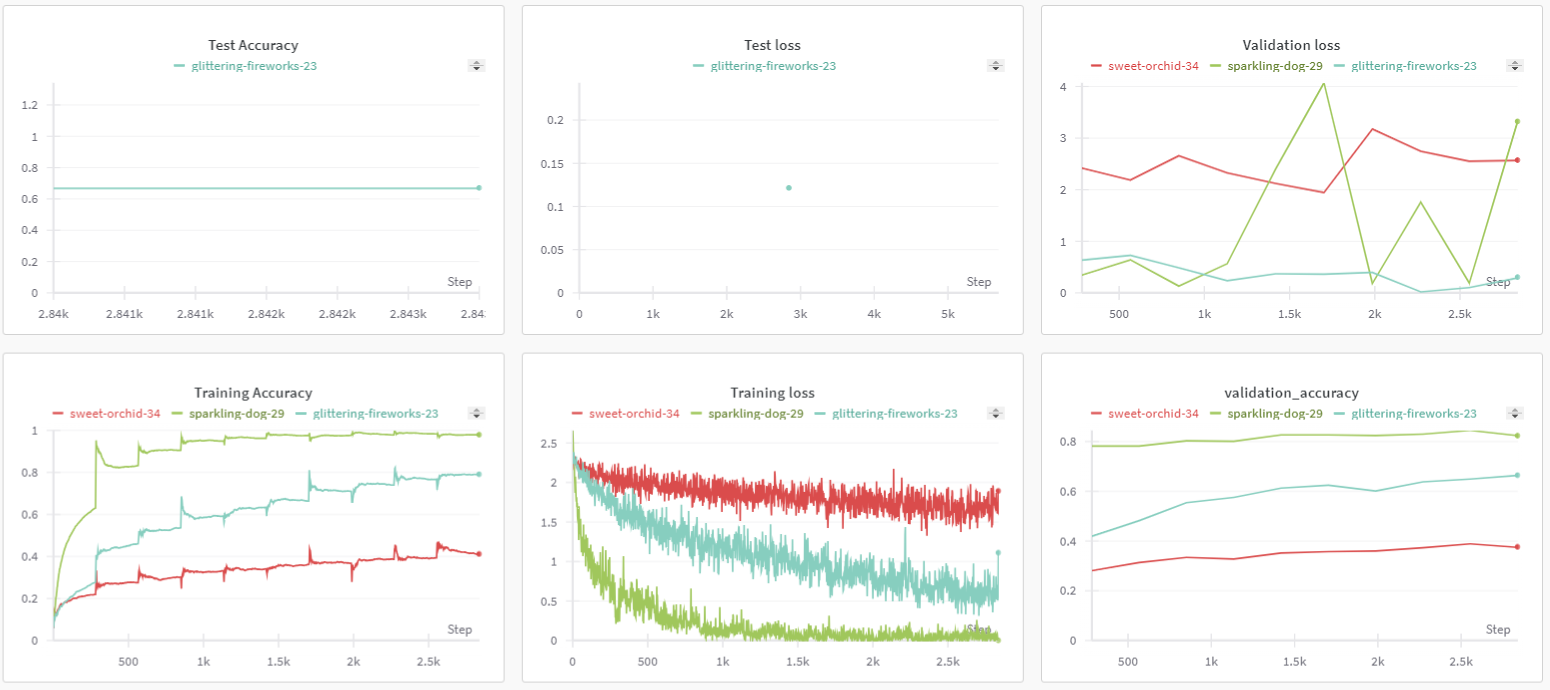

Here the labels are as follows:

- Cyan : glittering-fireworks : Default Convolutional Neural Network (Resnet18) with no fine-tuning
- Green : sparkling-dog : Resnet18 (pretrained) is fine-tuned on the dataset with 0.0001 learning rate
- Yellow : glistening-lantern : Resnet18 (pretrained) is fine-tuned on the dataset with 0.001 learning rate
- Red : sweet-orchid : Augmented Data # 1
- Blue : goldern-orchid : Augmented Data # 2

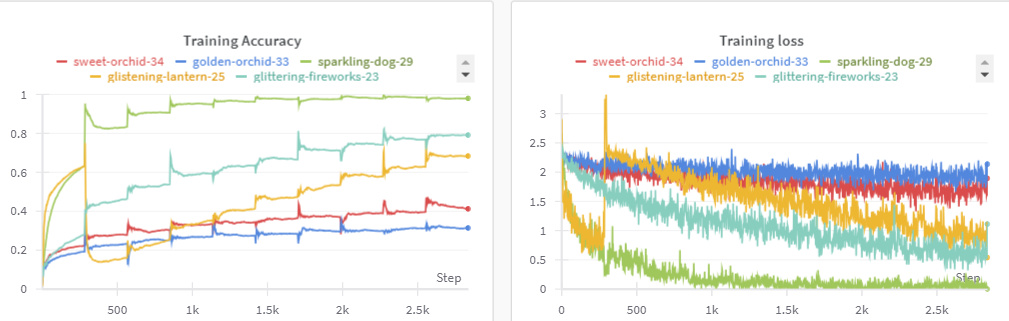

Now, we compare the models and derive conclusions:

1. We clearly see that pretrained models outperformed the other ones
2. We see effect of a higher learning rate on the yellow graph which seems to suddenly drop in accuracy and increase in loss, which was cured by decreasing the learning rate, it seems that at this stage the model was overshooting the minima and hence the learning rate was decreased to get a better minima
3. We were not able to attain better results using data augmentation, this might be due to the fact that the data augmentation was not able to generate enough data to make the model generalize better
4. However, We see that the augmented data with gaussian blur (Red) is slightly outperforming the one where the guassian blur is replaced by RandomCrop, this might be due to the fact that the gaussian blur is able to generate more data which is closer to the original data and hence the model is able to generalize better

Hence, we can conclude that the best model is the one which is pretrained and fine-tuned with a learning rate of 0.0001